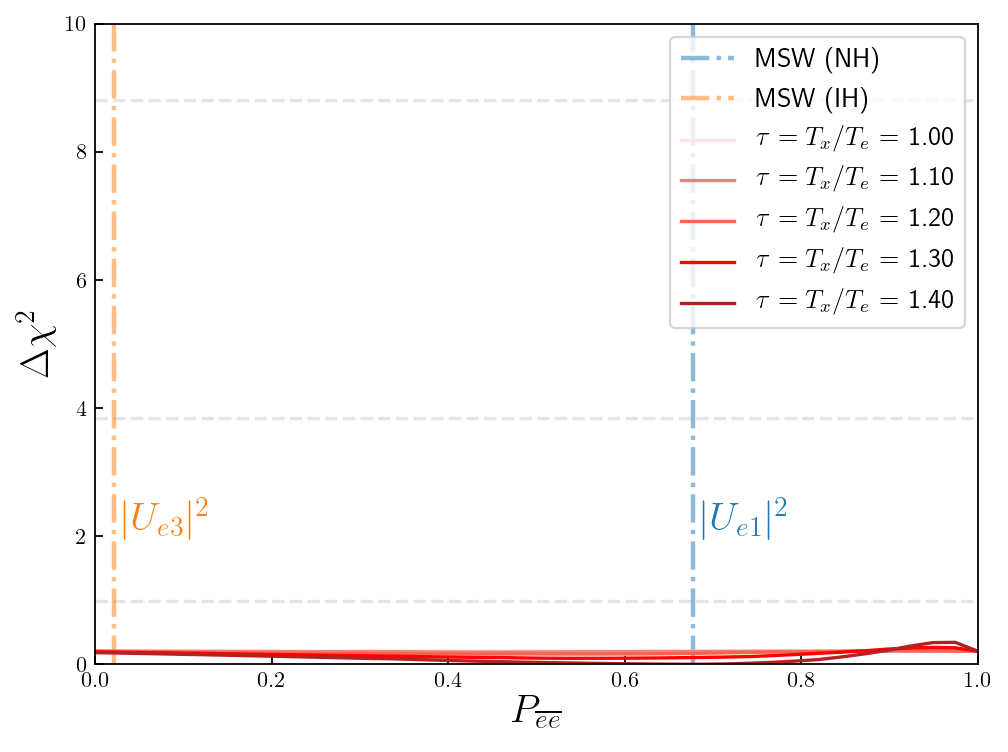

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from flavor_conversion import *
from scipy.stats import chi2   
plt.style.use('style.mplstyle')

#This data have efficiency, background
tau_vec=[1,1.1,1.2,1.3,1.4]
x_Pee_c=[]
L_Pee_c=[]

#Load
for tau in tau_vec:
    x_Pee_c.append(np.load("Output/Pee_c_tau_"+str(tau)+".npy"))
    L_Pee_c.append(np.load("Output/Like_Pee_c_tau_"+str(tau)+".npy"))
    
L_min_c=10**50
for i in range(len(tau_vec)):
        if L_min_c>np.amin(L_Pee_c[i]): L_min_c=np.amin(L_Pee_c[i])


##################################################################################
al = 0.2
al2 = 0.5
paleta = ['firebrick','red','tomato', 'lightcoral','mistyrose']
paleta.reverse()

plt.figure(dpi=160)
Pee_NH = Pe_surv(0,"NH")
Pee_IH = Pe_surv(0,"IH")
plt.plot(Pee_NH*np.ones(100), np.linspace(0,20,100), '-.', lw=2, label=r'MSW (NH)',alpha=al2)
plt.plot(Pee_IH*np.ones(100), np.linspace(0,20,100), '-.', lw=2, label=r'MSW (IH)',alpha=al2)

plt.text(0.01+Pee_NH, 2, r'$|U_{e1}|^2$', fontsize=18,c='tab:blue')
plt.text(0.01+Pee_IH, 2, r'$|U_{e3}|^2$', fontsize=18,c='tab:orange')

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c[i],L_Pee_c[i]-L_min_c,'-', c=paleta[i], label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))

plt.xlabel(r'$P_{\overline{ee}}$', fontsize=18)
plt.ylabel(r'$\Delta\chi^2$', fontsize=18)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.997, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.95, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.68, 1),'--', color='gray', alpha=al)
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
plt.show()